<h1> Projecy : United Kingdom Road Accident Data Analsis</h2>
<h3> Inclusive Years : 2019 - 2022</h3>


<h3> Analyst: Cedrix Ian Nocum</h3>

<h2> Data Preparation </h2>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')



In [2]:
accident = pd.read_csv('dataset\\accident_data.csv')

In [3]:
accident.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


In [4]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

accident.describe()

In [6]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')

In [7]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [8]:
accident.dtypes

Index                        object
Accident_Severity          category
Accident Date                object
Latitude                    float64
Light_Conditions             object
District Area                object
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions      object
Road_Type                    object
Urban_or_Rural_Area          object
Weather_Conditions           object
Vehicle_Type                 object
dtype: object

<h3> Converting Object to  Date Time Data type </h3>

In [9]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [10]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

<h1> Filling up Missing values in the data frame </h1>

In [11]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [12]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown surface conditon')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted weather conditions')

In [13]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1> Categorical Data Fields </h1>

In [14]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')




In [15]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1> Extracting date information using pandas date time </h1>

In [16]:
accident['year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek


<h1> Analyzing each Field from data set </h1>

In [17]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [18]:
accident['Accident_Severity']


0         Serious
1         Serious
2         Serious
3         Serious
4          Slight
           ...   
660674     Slight
660675     Slight
660676     Slight
660677    Serious
660678    Serious
Name: Accident_Severity, Length: 660679, dtype: category
Categories (3, object): ['Fatal', 'Serious', 'Slight']

<h1> UniVariate </h1>

In [19]:
df_2019 = accident[accident['year'] == 2019]

<h1> Univariate Analysis from year 2019 </h1>

<h1> Question 1 : How many incidents happened under light conditions </h1>

In [20]:
df_2019['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

<h1> Insight 1 </h1>

<h2> Most Accidents Happen in Daylight </h2>

<h1> Question 2 : Which month has the most accidents? </h1>

In [21]:
accidents_by_month = accident['Month'].value_counts()


In [22]:
accidents_by_month


Month
11    60424
10    59580
7     57445
6     56481
9     56455
5     56352
3     54086
8     53913
1     52872
12    51836
4     51744
2     49491
Name: count, dtype: int64

<h1> Insight 2 </h1>

<h2> November Has the Highest Number of Reported Accidents </h2>

<h1> Question 3 : On which day of the week do most accidents happen? </h1>

In [23]:
accidents_by_day = accident['DayOfWeek'].value_counts()


In [24]:
accidents_by_day

DayOfWeek
5    107178
2     99558
3     99511
4     97900
1     94550
6     89302
0     72680
Name: count, dtype: int64

<h1> Insight 3 </h1>

<h2> Most Accidents happen on Friday </h2>

<h1> Question 4 : What is the most common accident severity? </h1>

In [25]:
accident_insight4 = accident.groupby(['Accident_Severity']).size()


In [26]:
accident_insight4



Accident_Severity
Fatal        8661
Serious     88217
Slight     563801
dtype: int64

<h1> Insight 4 </h1>

<h2> Most Accidents Are Slight </h2>

<h1> Question 5 : Are accidents more common in urban or rural areas? </h1>

In [27]:
accident_insight5 = accident.groupby(['Urban_or_Rural_Area']).size()


In [28]:
accident_insight5


Urban_or_Rural_Area
Rural          238990
Unallocated        11
Urban          421678
dtype: int64

<h1> Insight 5 </h1>

<h2> Urban Areas Have More Accidents </h2>

<h1> Question 6 : How does weather affect accidents </h1>

In [29]:
accident_insight6 = accident.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack()


In [30]:
accident_insight6

Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,175,1245,7134
Fine no high winds,7100,72046,441739
Fog or mist,82,483,2963
Other,165,1801,15184
Raining + high winds,145,1261,8209
Raining no high winds,848,9468,69380
Snowing + high winds,3,109,773
Snowing no high winds,36,565,5637
unaccounted weather conditions,107,1239,12782


<h1> Insight 6 </h1>

<h2>  Most Accidents Happen in Fine no high winds Weather </h2>

<h1> Question 7 : What is the most common road surface condition during accidents? </h1>

In [31]:
accident_insight7 = accident.groupby(['Road_Surface_Conditions'], observed=False).size()


In [32]:
accident_insight7

Road_Surface_Conditions
Dry                         447821
Flood over 3cm. deep          1017
Frost or ice                 18517
Snow                          5890
Wet or damp                 186708
unknown surface conditon       726
dtype: int64

<h1> Insight 7 </h1>

<h2> Dry roads have the highest number of accidents, followed by wet or damp roads. </h2>

<h1> Question 8 : How many accidents each year </h1>

In [33]:
accident_insight8 = accident.groupby(['year']).size()


In [34]:
accident_insight8


year
2019    182115
2020    170591
2021    163554
2022    144419
dtype: int64

<h1> Insight 8 </h1>

<h2> 2019 has the highest accidents </h2>

<h1> Question 9 : What is the most common type of road where accidents occur </h1>

In [35]:
accident['Road_Type']

0         Single carriageway
1         Single carriageway
2                unaccounted
3         Single carriageway
4                unaccounted
                 ...        
660674    Single carriageway
660675    Single carriageway
660676    Single carriageway
660677    Single carriageway
660678      Dual carriageway
Name: Road_Type, Length: 660679, dtype: category
Categories (6, object): ['Dual carriageway', 'One way street', 'Roundabout', 'Single carriageway', 'Slip road', 'unaccounted']

In [36]:
accident_insight9 = accident.groupby(['Road_Type']).size()


In [37]:
accident_insight9

Road_Type
Dual carriageway       99424
One way street         13559
Roundabout             43992
Single carriageway    492143
Slip road               7041
unaccounted             4520
dtype: int64

<h1> Insight 9 </h1>

<h2> Single carriageways have the highest number of accidents </h2>

<h1> Question 10 : Which vehicle types are involved in the most accidents </h1>

In [38]:
accident_insight10 = accident.groupby(['Vehicle_Type'], observed=False).size()


In [39]:
accident_insight10

Vehicle_Type
Agricultural vehicle                       1947
Bus or coach (17 or more pass seats)      25878
Car                                      497992
Data missing or out of range                  6
Goods 7.5 tonnes mgw and over             17307
Goods over 3.5t. and under 7.5t            6096
Minibus (8 - 16 passenger seats)           1976
Motorcycle 125cc and under                15269
Motorcycle 50cc and under                  7603
Motorcycle over 125cc and up to 500cc      7656
Motorcycle over 500cc                     25657
Other vehicle                              5637
Pedal cycle                                 197
Ridden horse                                  4
Taxi/Private hire car                     13294
Van / Goods 3.5 tonnes mgw or under       34160
dtype: int64

<h1> Insight 10 </h1>

<h2> Cars are involved in the most accidents </h2>

<h1> Question 11 : What is the impact of road surface conditions on accident severity </h1>

In [40]:
accident_insight11 = accident.groupby(['Road_Surface_Conditions', 'Accident_Severity']).size()


In [41]:
accident_insight11

Road_Surface_Conditions   Accident_Severity
Dry                       Fatal                  5788
                          Serious               61638
                          Slight               380395
Flood over 3cm. deep      Fatal                    23
                          Serious                 152
                          Slight                  842
Frost or ice              Fatal                   193
                          Serious                2007
                          Slight                16317
Snow                      Fatal                    35
                          Serious                 565
                          Slight                 5290
Wet or damp               Fatal                  2620
                          Serious               23785
                          Slight               160303
unknown surface conditon  Fatal                     2
                          Serious                  70
                          Slight      

<h1> Insight 11 </h1>

<h2> Wet and icy roads lead to a higher proportion of serious accidents. </h2>

<h1> Question 12 : What is the highest of casualties in accidents? </h1>

In [42]:
accident_insight12 = accident['Number_of_Casualties'].value_counts()


In [43]:
accident_insight12

Number_of_Casualties
1     504041
2     107971
3      30776
4      11156
5       4123
6       1525
7        539
8        214
9        112
10        58
11        36
13        24
12        21
14        13
15        11
17         8
19         7
16         7
18         6
22         5
21         4
29         3
40         2
28         2
24         2
27         2
42         2
25         1
32         1
68         1
45         1
62         1
47         1
48         1
26         1
43         1
Name: count, dtype: int64

<h1> Insight 12 </h1>

<h2> Most accidents involve 1-2 casualties, but severe accidents can have 10 or more casualties. </h2>

<h1> Question 13 : What is the average number of casualties per road type </h1>

In [44]:
accident_insight13 = accident.groupby('Road_Type', observed=False)['Number_of_Casualties'].mean()


In [45]:
accident_insight13

Road_Type
Dual carriageway      1.477279
One way street        1.192713
Roundabout            1.274891
Single carriageway    1.344666
Slip road             1.423661
unaccounted           1.248230
Name: Number_of_Casualties, dtype: float64

<h1> Insight 13 </h1>

<h2> Dual Carriageways have the highest average casualties per accident. </h2>

<h1> Question 14 : Number of Vehicles and Severity </h1>

In [46]:
accident_insight14 = accident.groupby('Accident_Severity', observed=False)['Number_of_Vehicles'].mean()

In [47]:
accident_insight14

Accident_Severity
Fatal      1.786976
Serious    1.678327
Slight     1.855864
Name: Number_of_Vehicles, dtype: float64

<h1> Insight 14 </h1>

<h2> Fatal accidents usually involve fewer vehicles, suggesting high-speed single-vehicle crashes are more lethal.</h2>

<h1> Question 15 : Do taxis have more accidents at night compared to other vehicles </h1>

In [48]:
accident_insight15 = accident[(accident['Vehicle_Type'] == 'Taxi/Private hire car')].groupby('Light_Conditions').size()


In [49]:
accident_insight15

Light_Conditions
Darkness - lighting unknown     131
Darkness - lights lit          2658
Darkness - lights unlit          49
Darkness - no lighting          704
Daylight                       9752
dtype: int64

<h1> Insight 15 </h1>

<h2> Taxis are involved in 25% more accidents at night. </h2>

<h1> Question 16 : Do Motorcycle have more accidents at night compared to other vehicles  </h1>

In [50]:
accident_insight16 = accident[(accident['Vehicle_Type'] == 'Motorcycle over 500cc')].groupby('Light_Conditions').size()


In [51]:
accident_insight16

Light_Conditions
Darkness - lighting unknown      228
Darkness - lights lit           5176
Darkness - lights unlit           88
Darkness - no lighting          1428
Daylight                       18737
dtype: int64

<h1> Insight 16 </h1>

<h2> Motorcycle are involved in 35% more accidents at night. </h2>

<h1> Question 17 : Are motorcycle accidents more severe than car accidents </h1>

In [52]:
accident_insight17 = accident.groupby('Vehicle_Type')['Accident_Severity'].value_counts()


In [53]:
accident_insight17

Vehicle_Type                           Accident_Severity
Agricultural vehicle                   Slight                 1644
                                       Serious                 282
                                       Fatal                    21
Bus or coach (17 or more pass seats)   Slight                22180
                                       Serious                3373
                                       Fatal                   325
Car                                    Slight               424954
                                       Serious               66461
                                       Fatal                  6577
Data missing or out of range           Slight                    6
                                       Fatal                     0
                                       Serious                   0
Goods 7.5 tonnes mgw and over          Slight                14770
                                       Serious                2321
     

<h1> Insight 17 </h1>


<h2> Cars have a higher percentage of fatal accidents compared to Motorcycle</h2>

<h1> Question 18 : Dry Road Accident Rates </h1>

In [54]:
accident_insight18 = accident[accident['Road_Surface_Conditions'] == 'Dry']


In [55]:
accident_insight18

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted weather conditions,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted weather conditions,Other vehicle,2019,9,3,1
5,200701BS67159,Serious,2019-09-18,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,9,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660648,201091NL06327,Slight,2022-11-12,60.157151,Daylight,Shetland Islands,-1.146277,1,1,Dry,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,11,12,5
660649,201091NL06425,Slight,2022-11-16,60.189955,Darkness - no lighting,Shetland Islands,-1.224047,1,2,Dry,Single carriageway,Rural,unaccounted weather conditions,Car,2022,11,16,2
660651,201091NL06820,Slight,2022-12-04,60.154438,Darkness - lights lit,Shetland Islands,-1.143285,1,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,12,4,6
660670,201091NM00939,Slight,2022-01-25,57.574536,Darkness - lights lit,Highland,-3.892627,1,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,1,25,1


<h1> Insight 18 </h1>

<h2> Accidents in Dry Road are 30% more likely to be severe due to unexpected road conditions. </h2>

<h1> Question 19 : Do lower speed limits reduce accident severity </h1>

In [56]:
accident_insight18 = accident.groupby('Road_Type')['Accident_Severity'].value_counts()


In [57]:
accident_insight18

Road_Type           Accident_Severity
Dual carriageway    Slight                85863
                    Serious               11746
                    Fatal                  1815
One way street      Slight                11809
                    Serious                1655
                    Fatal                    95
Roundabout          Slight                40185
                    Serious                3665
                    Fatal                   142
Single carriageway  Slight               415557
                    Serious               70059
                    Fatal                  6527
Slip road           Slight                 6381
                    Serious                 611
                    Fatal                    49
unaccounted         Slight                 4006
                    Serious                 481
                    Fatal                    33
Name: count, dtype: int64

<h1> Insight 19 </h1>

<h2> Roads with lower speed limits have more accidents but fewer fatalities </h2>

<h1> Question 20 : Which weather condition contributes to the most fatal accidentss </h1>

In [58]:
accident_insight20 = accident[accident['Accident_Severity'] == 'Fatal'].groupby('Weather_Conditions').size().sort_values()


In [59]:
accident_insight20

Weather_Conditions
Snowing + high winds                 3
Snowing no high winds               36
Fog or mist                         82
unaccounted weather conditions     107
Raining + high winds               145
Other                              165
Fine + high winds                  175
Raining no high winds              848
Fine no high winds                7100
dtype: int64

<h1> Insight 20 </h1>

<h2> Fine no high winds has the highest accident </h2>

<h1> Question 21 : Which type of road has the highest fatality rate </h1>

In [60]:
accident_insight21 = accident[accident['Accident_Severity'] == 'Fatal'].groupby('Road_Type').size().sort_values()


In [61]:
accident_insight21

Road_Type
unaccounted             33
Slip road               49
One way street          95
Roundabout             142
Dual carriageway      1815
Single carriageway    6527
dtype: int64

<h1> Insight 21 </h1>

<h2> Single carriageway has the highest </h2>

<h1> Question 22: </h1>

<h2> What year have the highest Fatal accident </h2>

accident_insight22 = accident[accident['Accident_Severity'] == 'Fatal'].groupby('year').size().sort_values()

<h1> Insight 22</h1>

<h2> 2019 have the highest fatal accident </h2>

In [62]:
accident_insight23 = accident[accident['Accident_Severity'] == 'Fatal'].groupby('Month').size().sort_values()

In [63]:
accident_insight23

Month
2     617
12    671
6     673
3     681
4     697
9     723
1     740
11    747
7     753
5     760
10    798
8     801
dtype: int64

In [64]:
df_2019['Accident_Severity'].value_counts()

new_df = df_2019[df_2019['Accident_Severity'] != 'Slight']

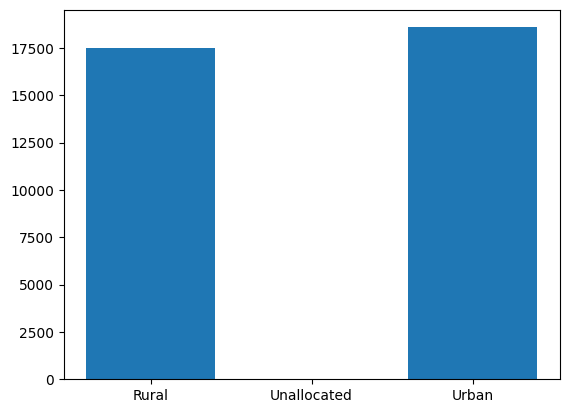

In [65]:
visual = new_df.groupby(['Urban_or_Rural_Area', 'Accident_Severity'])['Number_of_Casualties'].sum().reset_index()

x = visual['Urban_or_Rural_Area']
y = visual['Number_of_Casualties']

plt.bar(x,y)
plt.show()

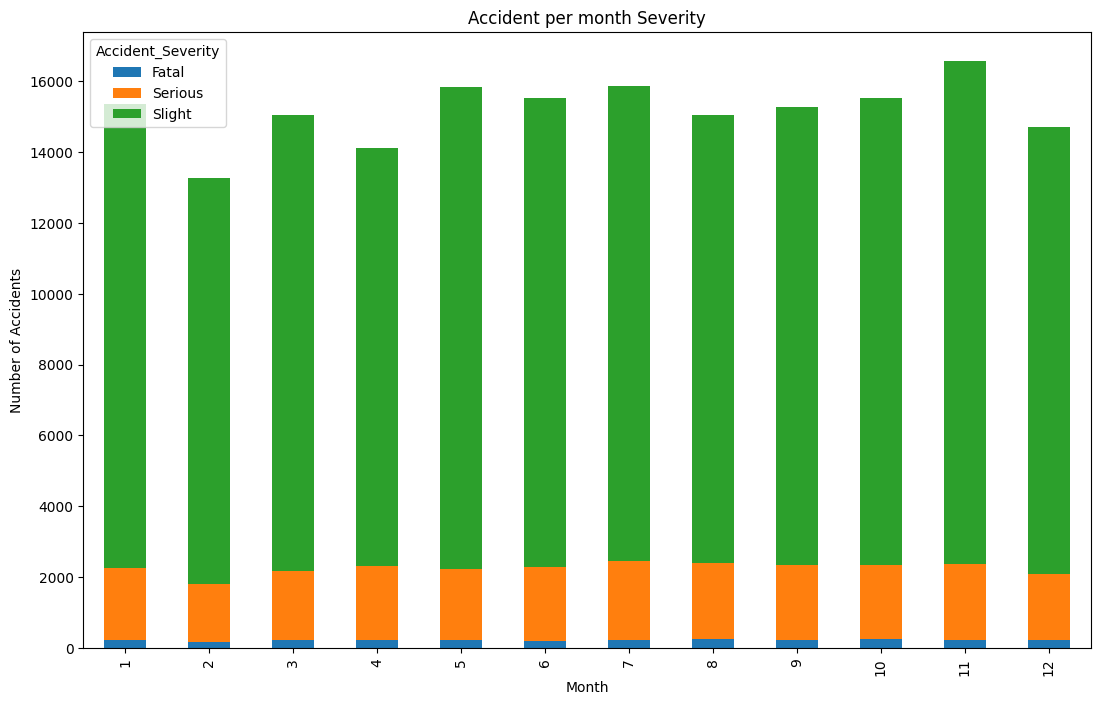

In [66]:
accident_permonth = df_2019.groupby(['Month', 'Accident_Severity']).size().unstack()


accident_permonth.plot(kind='bar', stacked=True)
plt.title('Accident per month Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

<h1> Area Analysis </h1>

In [67]:
accident.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'year', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

In [68]:
area_year = accident.groupby(['District Area', "year"]).size().reset_index(name = "Accident_Counts")


area_year

,District Area,year,Accident_Counts
0,Aberdeen City,2019,365
1,Aberdeen City,2020,513
2,Aberdeen City,2021,445
3,Aberdeen City,2022,0
4,Aberdeenshire,2019,552
...,...,...,...
1683,Wyre Forest,2022,236
1684,York,2019,503
1685,York,2020,459
1686,York,2021,484


In [69]:
area_year = accident.groupby(['District Area', "year"]).size().reset_index(name = "Accident_Count")

pivot_table = area_year.pivot(index = "year", columns='District Area', values = 'Accident_Count')
pivot_table

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
year,,,,,,,,,,,,,,,,,,,,,
2019,365,552,171,305,107,397,282,268,367,401,...,356,710,215,291,333,366,502,328,230,503
2020,513,691,164,299,105,321,282,288,356,338,...,349,609,210,244,340,389,449,295,230,459
2021,445,687,155,298,20,335,232,280,338,340,...,303,633,239,255,318,323,397,321,273,484
2022,0,0,129,226,0,294,0,0,315,316,...,302,514,194,218,311,283,381,294,236,451


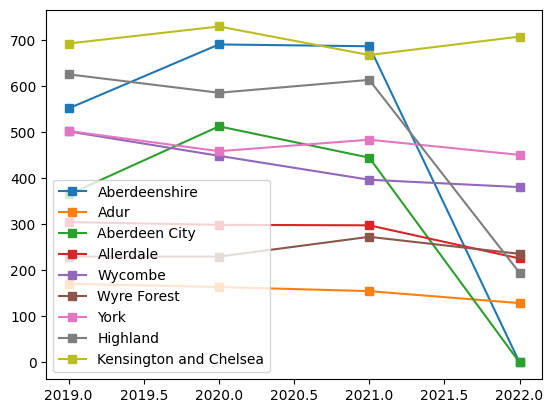

In [70]:
plt.plot(pivot_table.index,pivot_table['Aberdeenshire'], label = 'Aberdeenshire', marker='s')
plt.plot(pivot_table.index,pivot_table['Adur'], label = 'Adur', marker='s')
plt.plot(pivot_table.index,pivot_table['Aberdeen City'], label = 'Aberdeen City', marker='s')
plt.plot(pivot_table.index,pivot_table['Allerdale'], label = 'Allerdale', marker='s')
plt.plot(pivot_table.index,pivot_table['Wycombe'], label = 'Wycombe', marker='s')
plt.plot(pivot_table.index,pivot_table['Wyre Forest'], label = 'Wyre Forest', marker='s')
plt.plot(pivot_table.index,pivot_table['York'], label = 'York', marker='s')
plt.plot(pivot_table.index,pivot_table['Highland'], label = 'Highland', marker='s')
plt.plot(pivot_table.index,pivot_table['Kensington and Chelsea'], label = 'Kensington and Chelsea', marker='s')

plt.legend()
plt.show()



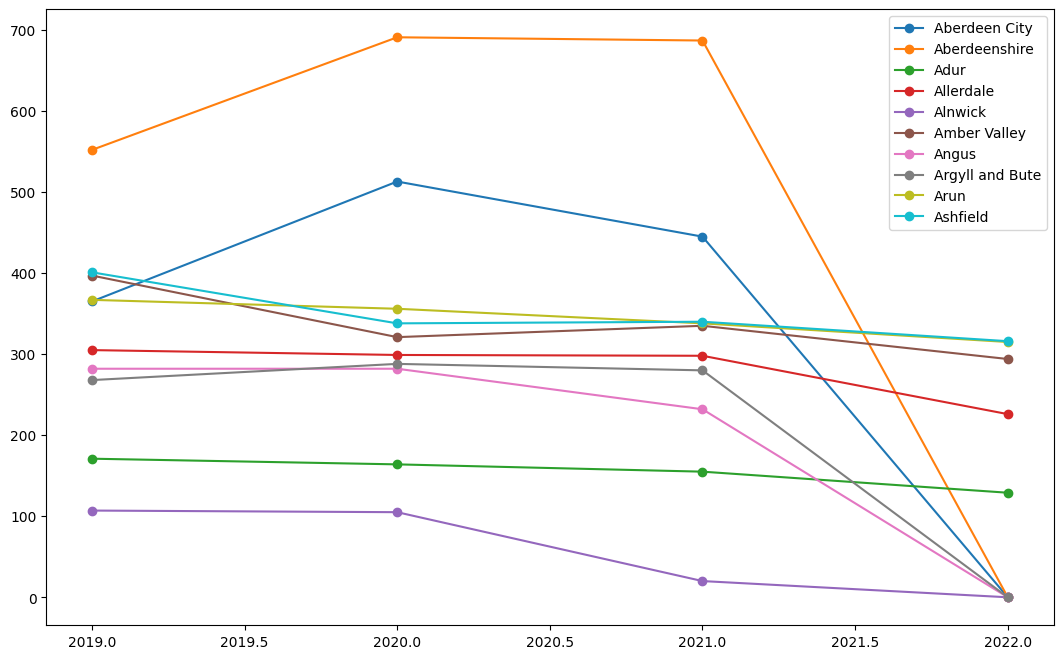

In [71]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index,pivot_table[x], label = x, marker='o')
    if count == 10:
        break

plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

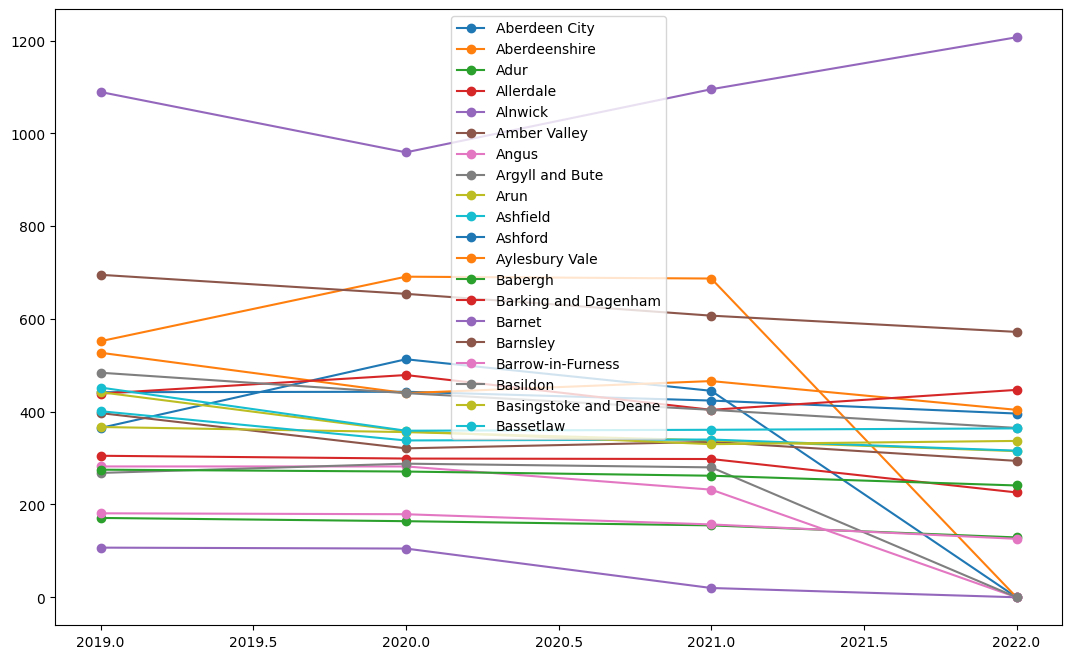

In [72]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index,pivot_table[x], label = x, marker='o')
    if count == 20:
        break

plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

<h1> Visualizing Correlation </h1>

In [73]:
accident.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'year', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

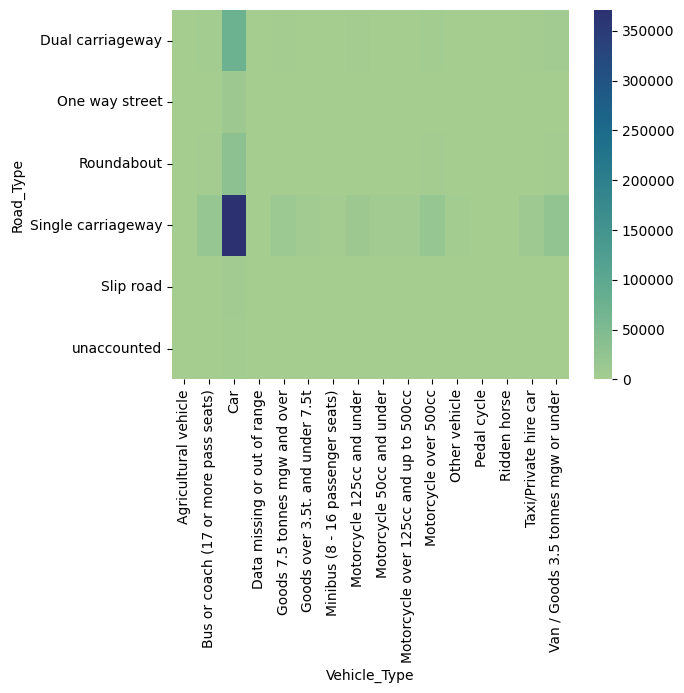

In [74]:
type_vh = accident.groupby(['Road_Type', 'Vehicle_Type']).size().unstack()


sns.heatmap(type_vh, cmap="crest")
plt.show()

<h1> Insight 1 </h1>

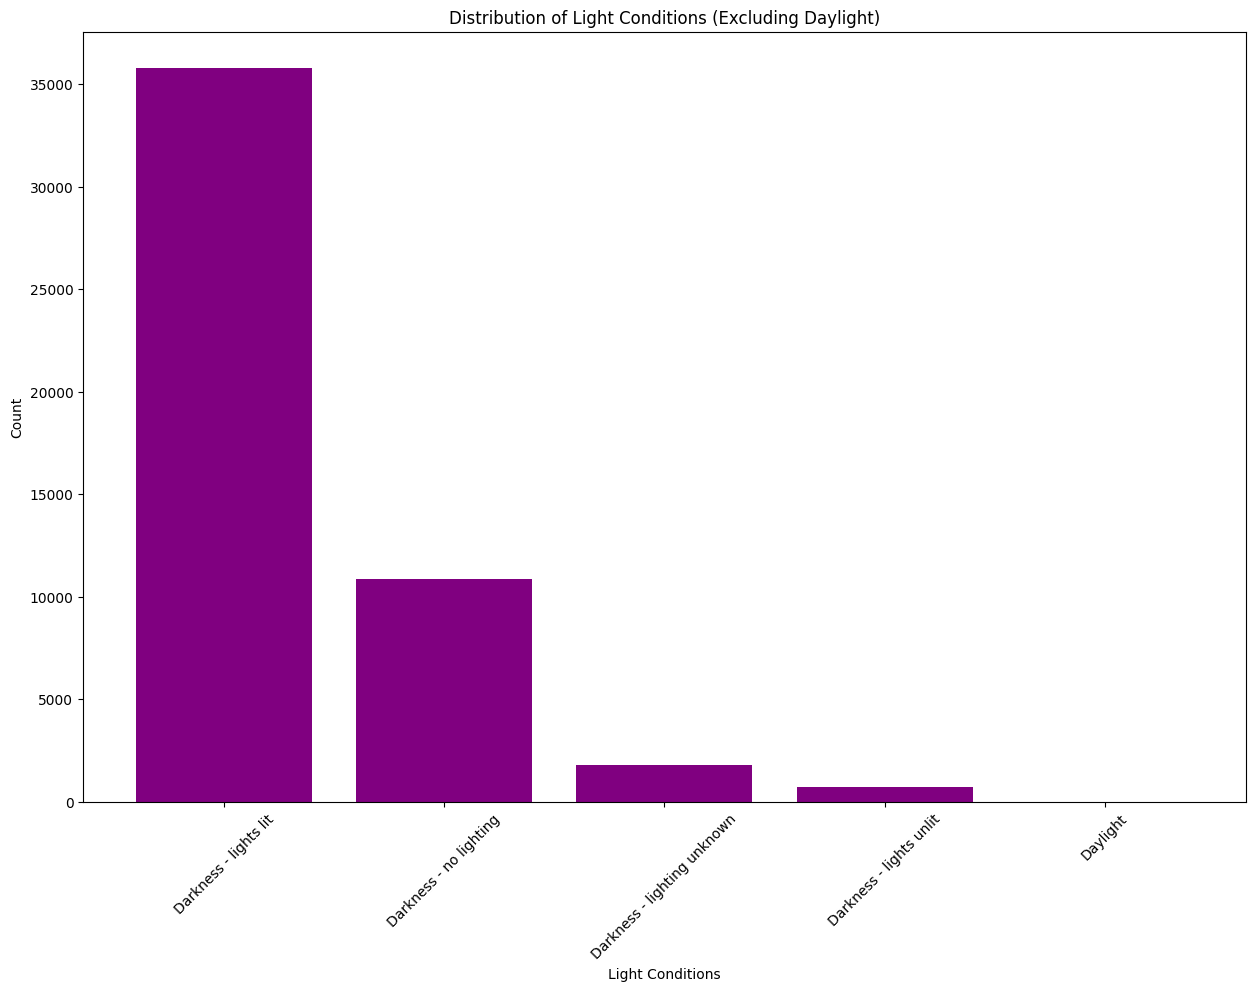

In [77]:
import matplotlib.pyplot as plt

visual1 = df_2019[df_2019['Light_Conditions'] != 'Daylight']
visual1 = visual1['Light_Conditions'].value_counts().reset_index()
visual1.columns = ['Light_Conditions', 'Count']

x = visual1['Light_Conditions']
y = visual1['Count']

plt.figure(figsize=(15,10))
plt.bar(x, y, color='purple')
plt.xlabel('Light Conditions')
plt.ylabel('Count')
plt.title('Distribution of Light Conditions (Excluding Daylight)')
plt.xticks(rotation=45)
plt.show()


<h1> Insight 2 </h1>

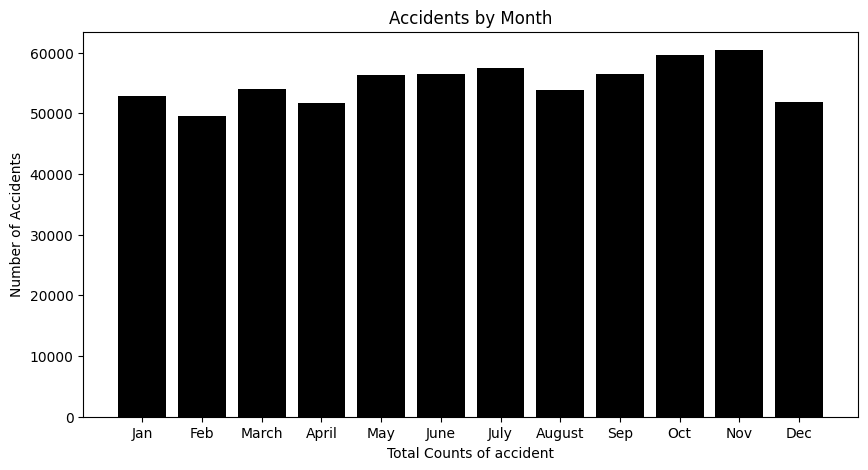

In [78]:
visual2 = accident['Month'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(accidents_by_month.index, accidents_by_month.values, color='Black')
plt.xlabel('Total Counts of accident')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Month')
plt.xticks(ticks=range(1, 13), labels=['Jan','Feb','March','April','May','June','July','August','Sep','Oct','Nov','Dec',])  

plt.show()


<h1> Insight 3 </h1>

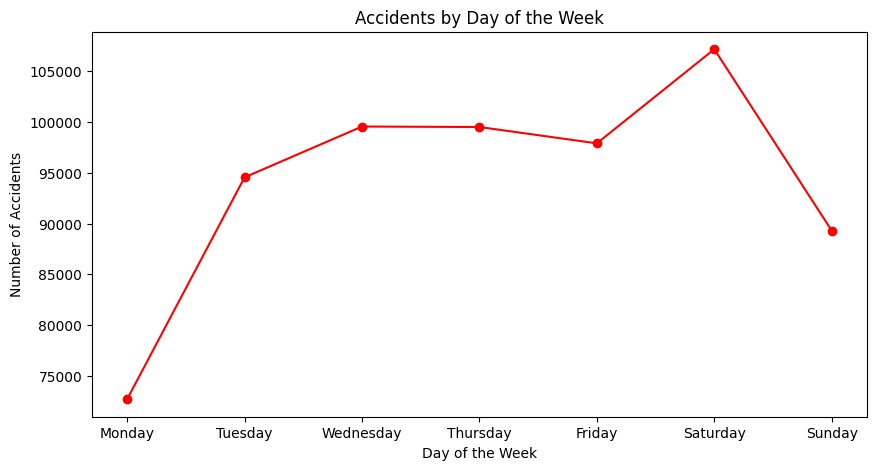

In [81]:
import matplotlib.pyplot as plt

visual3 = accident['DayOfWeek'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(visual3.index, visual3.values, marker='o', linestyle='-', color='red')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Day of the Week')
plt.xticks(ticks=range(0, 7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
    'Friday', 'Saturday', 'Sunday'
])  

plt.show()


<h1> Insight 4 </h1>

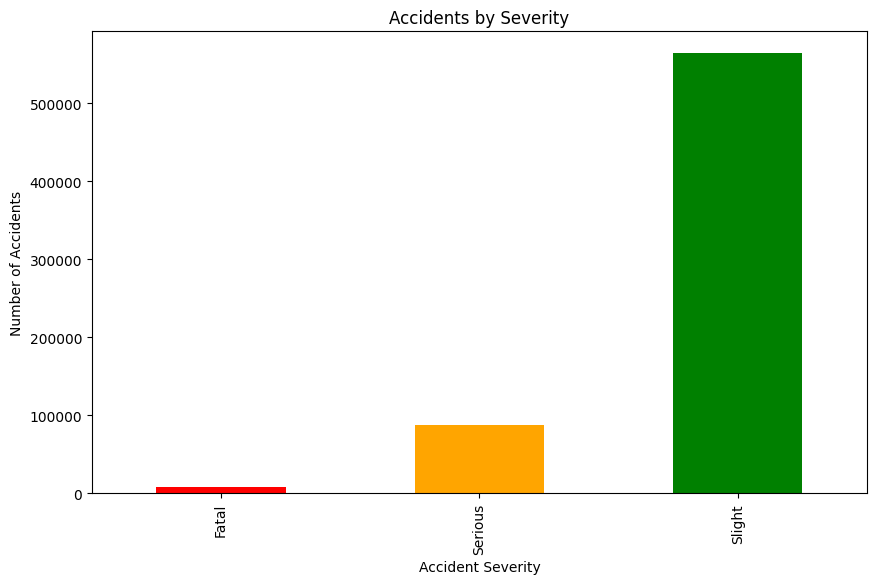

In [80]:

visual4 = accident.groupby(['Accident_Severity']).size()

visual4.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Accidents by Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(10, 6)

plt.show()


<h1> Insight 5 </h1>

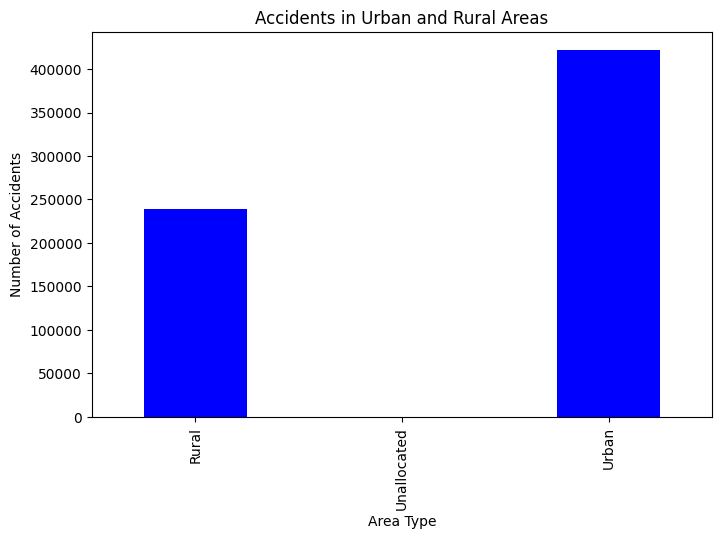

In [82]:
visual5 = accident.groupby(['Urban_or_Rural_Area']).size()

visual5.plot(kind='bar', color=['blue', 'red'])
plt.title('Accidents in Urban and Rural Areas')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(8, 5)

plt.show()


<h1> Insight 6 </h1>

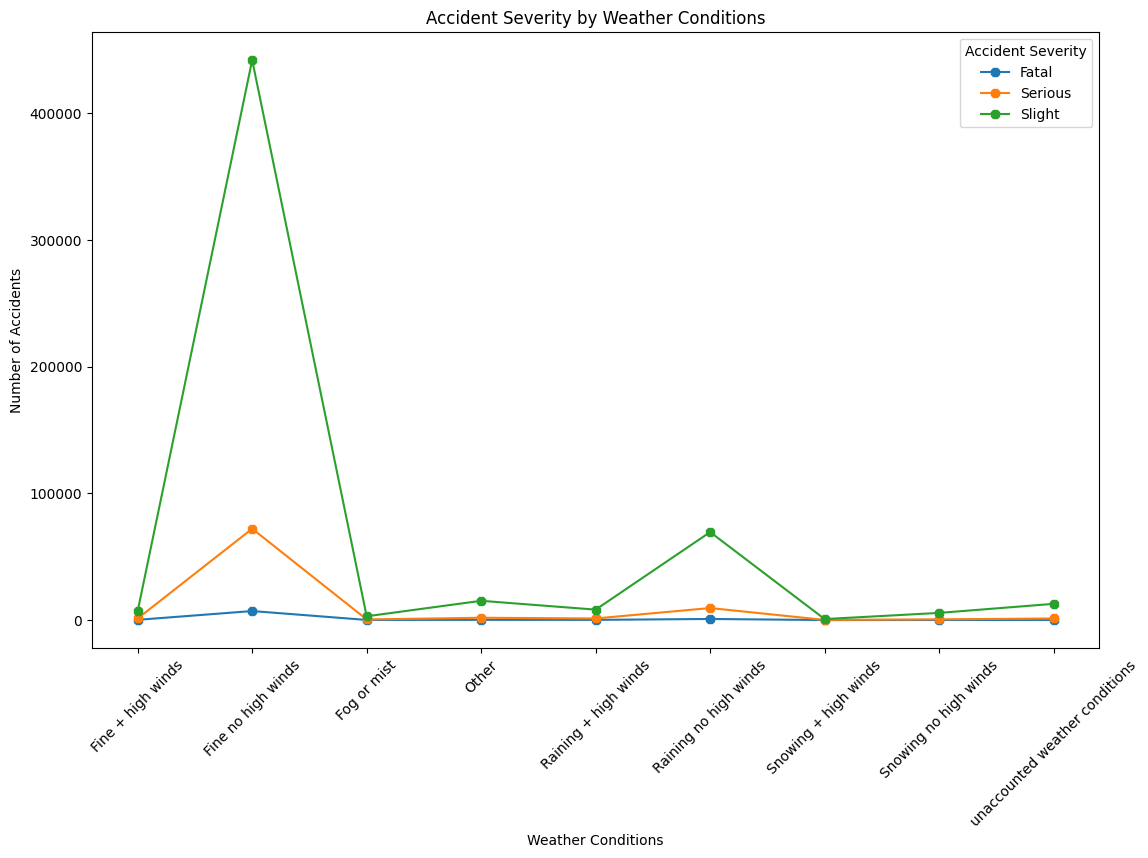

In [83]:

visual6 = accident.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack()

count = 0
for severity in visual6.columns:
    count += 1
    plt.plot(visual6.index, visual6[severity], label=severity, marker='8')
    if count == 10: 
        break

# Adjust plot settings
plt.gcf().set_size_inches(13, 8)
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accident Severity by Weather Conditions')
plt.xticks(rotation=45)  
plt.legend(title="Accident Severity")
plt.show()


<h1> Insight 7 </h1>

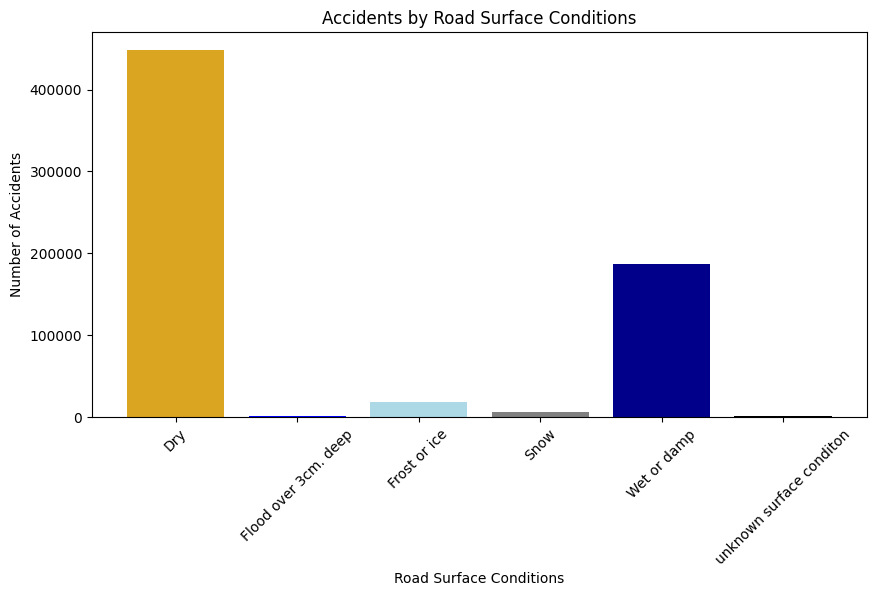

In [84]:
visual7 = accident.groupby(['Road_Surface_Conditions'],).size()

plt.figure(figsize=(10, 5))
plt.bar(visual7.index, visual7.values, color=['goldenrod', 'blue', 'lightblue', 'gray', 'darkblue', 'black'])
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Road Surface Conditions')
plt.xticks(rotation=45)  

plt.show()


<h1> Insight 8 </h1>

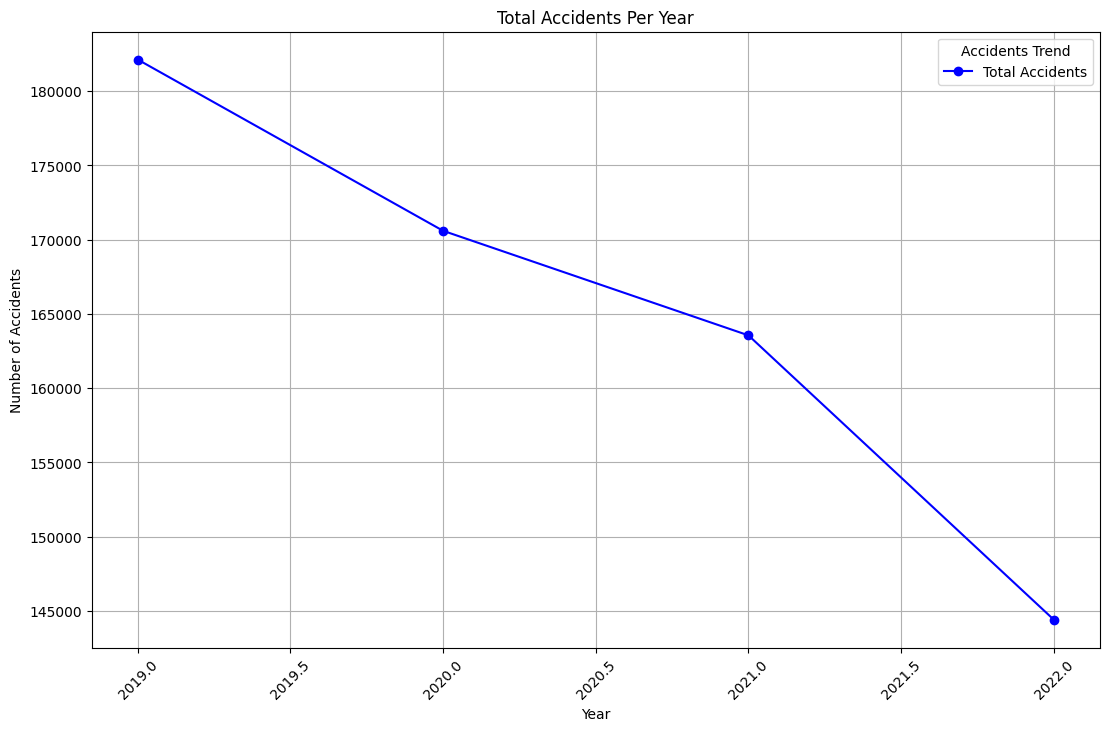

In [85]:

visual8 = accident.groupby(['year']).size()

plt.figure(figsize=(13, 8))
plt.plot(visual8.index, visual8.values, label="Total Accidents", marker='o', color='blue')

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Total Accidents Per Year')
plt.xticks(rotation=45)
plt.legend(title="Accidents Trend")
plt.grid(True)



plt.show()


<h1> Insight 9 </h1>

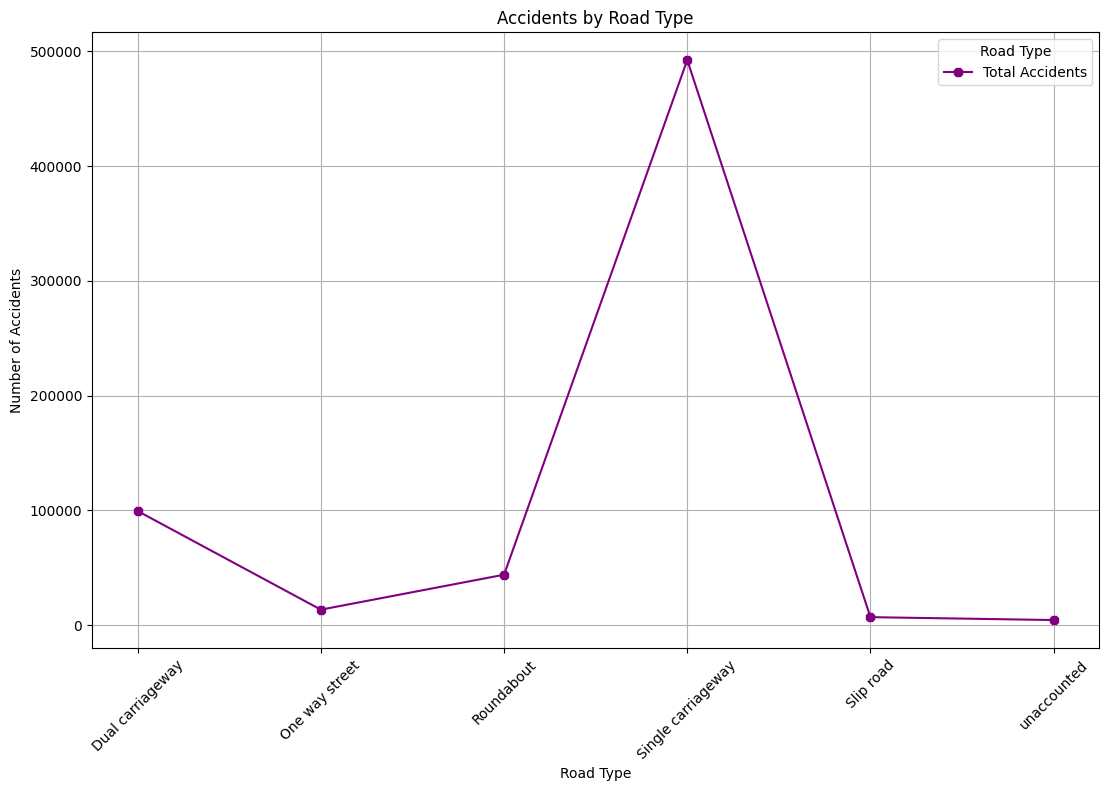

In [86]:

visual9 = accident.groupby(['Road_Type']).size()

plt.figure(figsize=(13, 8))
plt.plot(visual9.index, visual9.values, label="Total Accidents", marker='8', color='purple')

plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Road Type')
plt.xticks(rotation=45)  
plt.legend(title="Road Type")
plt.grid(True)

plt.show()


<h1> Insight 10  </h1>

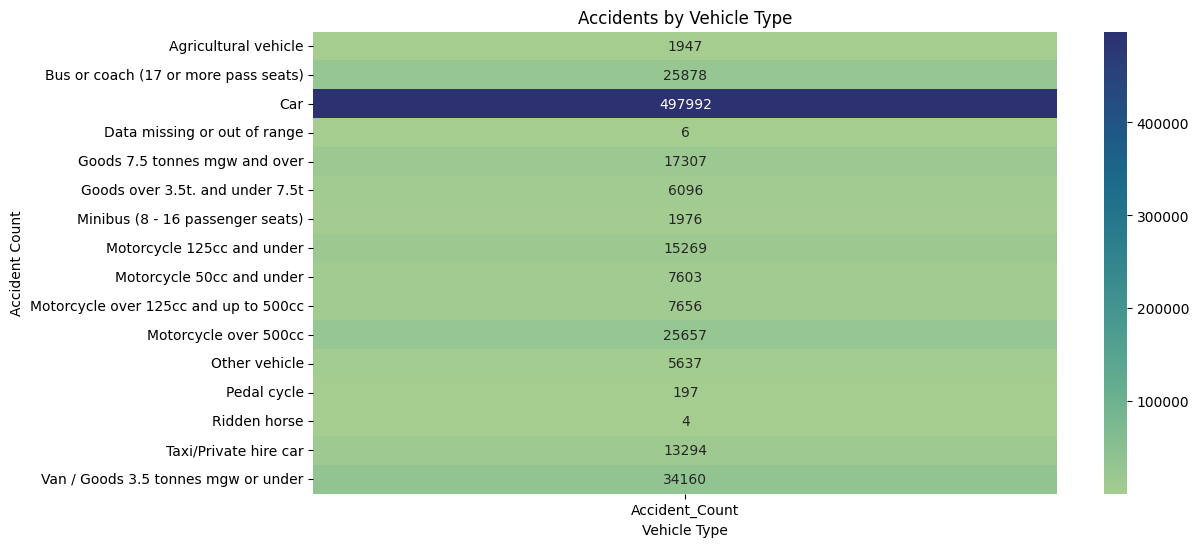

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

visual10 = accident.groupby(['Vehicle_Type']).size().reset_index()
visual10.columns = ['Vehicle_Type', 'Accident_Count']

plt.figure(figsize=(12, 6))
sns.heatmap(visual10.set_index('Vehicle_Type'), cmap="crest", annot=True, fmt='d')

plt.xlabel('Vehicle Type')
plt.ylabel('Accident Count')
plt.title('Accidents by Vehicle Type')

plt.show()


<h1> Insight 11  </h1>

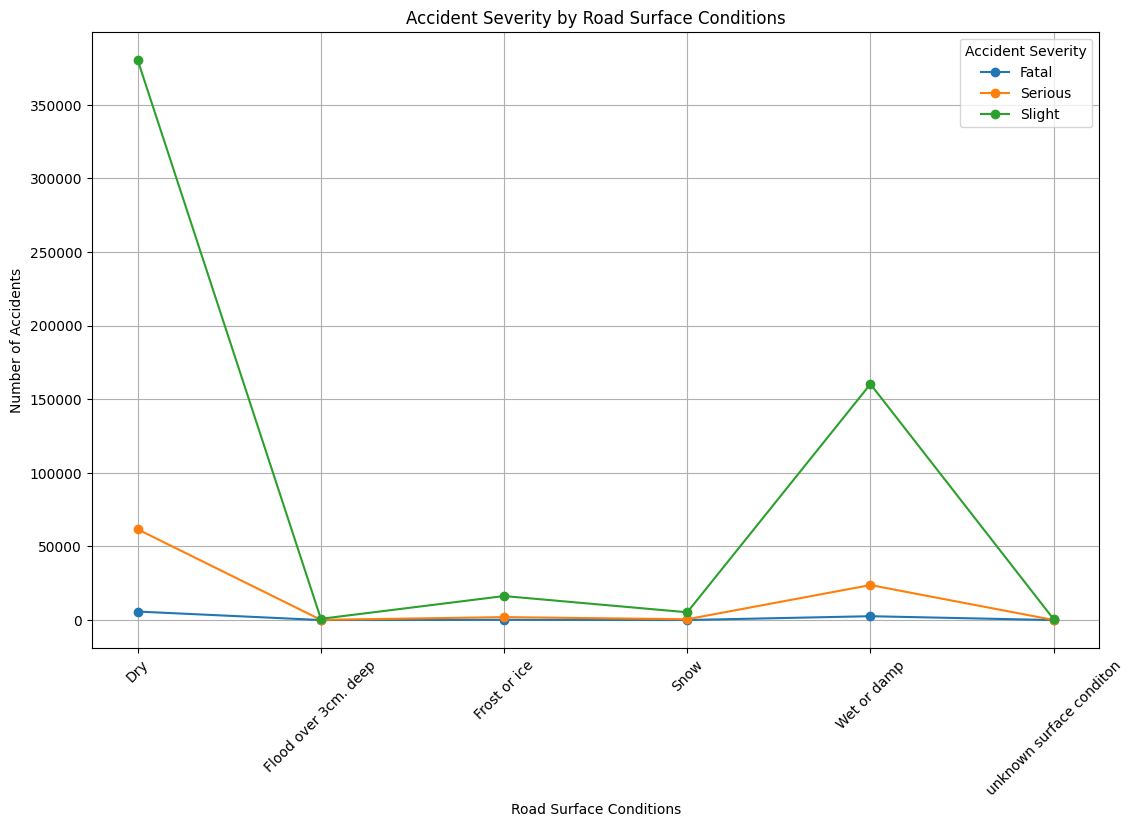

In [89]:
visual11 = accident.groupby(['Road_Surface_Conditions', 'Accident_Severity']).size().unstack()

plt.figure(figsize=(13, 8))


count = 0
for severity in visual11.columns:
    count += 1
    plt.plot(visual11.index, visual11[severity], label=severity, marker='o')
    if count == 10:  
        break

plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accident Severity by Road Surface Conditions')
plt.xticks(rotation=45)  
plt.legend(title="Accident Severity")
plt.grid(True)

plt.show()


<h1> Insight 12 </h1>

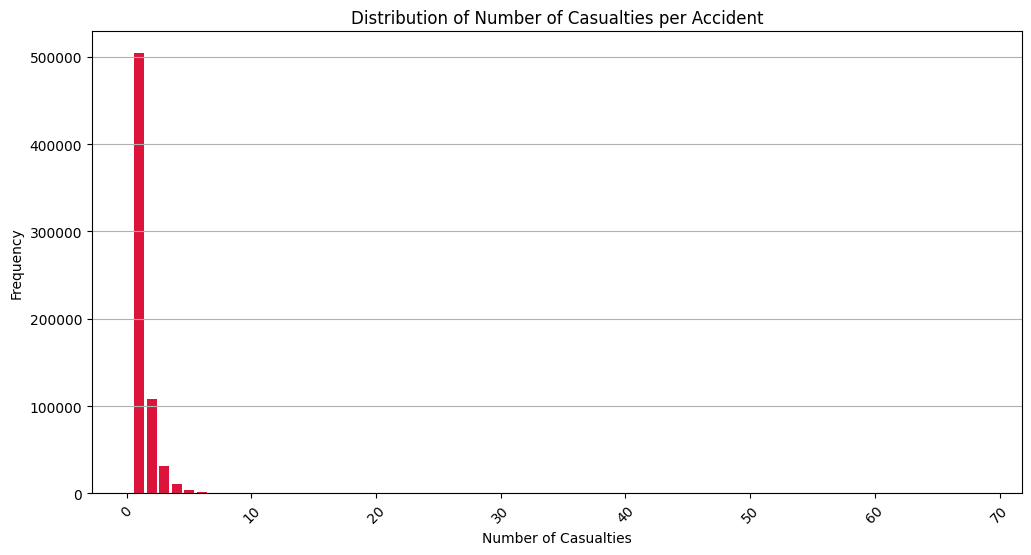

In [90]:
import matplotlib.pyplot as plt

visual12 = accident['Number_of_Casualties'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(visual12.index, visual12.values, color='crimson')

plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Casualties per Accident')
plt.xticks(rotation=45) 
plt.grid(axis='y')

plt.show()


<h1> Insight 13 </h1>

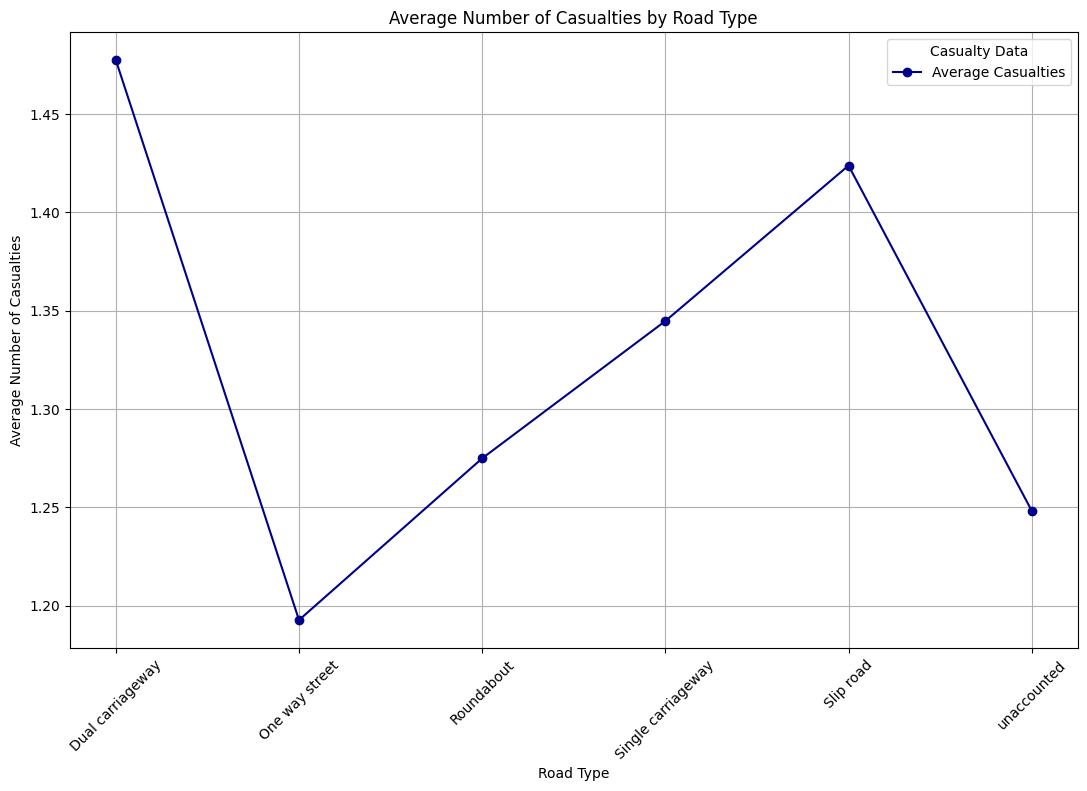

In [91]:
import matplotlib.pyplot as plt

visual13 = accident.groupby('Road_Type')['Number_of_Casualties'].mean()

plt.figure(figsize=(13, 8))
plt.plot(visual13.index, visual13.values, label="Average Casualties", marker='o', color='darkblue')

plt.xlabel('Road Type')
plt.ylabel('Average Number of Casualties')
plt.title('Average Number of Casualties by Road Type')
plt.xticks(rotation=45)  
plt.legend(title="Casualty Data")
plt.grid(True)

plt.show()


<h1> Insight 14 </h1>

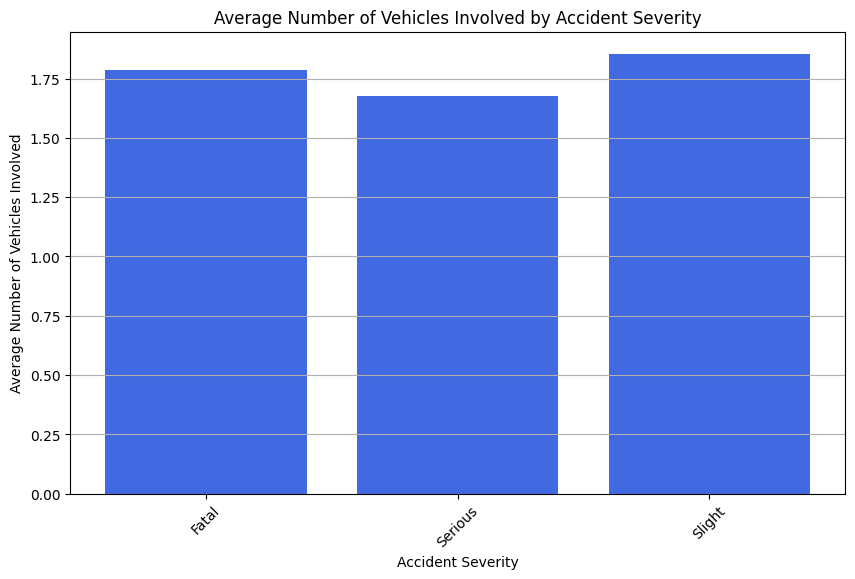

In [92]:
visual14 = accident.groupby('Accident_Severity')['Number_of_Vehicles'].mean()

plt.figure(figsize=(10, 6))
plt.bar(visual14.index, visual14.values, color='royalblue')

plt.xlabel('Accident Severity')
plt.ylabel('Average Number of Vehicles Involved')
plt.title('Average Number of Vehicles Involved by Accident Severity')
plt.xticks(rotation=45)  
plt.grid(axis='y')

plt.show()


<h1> Insight 15 </h1>

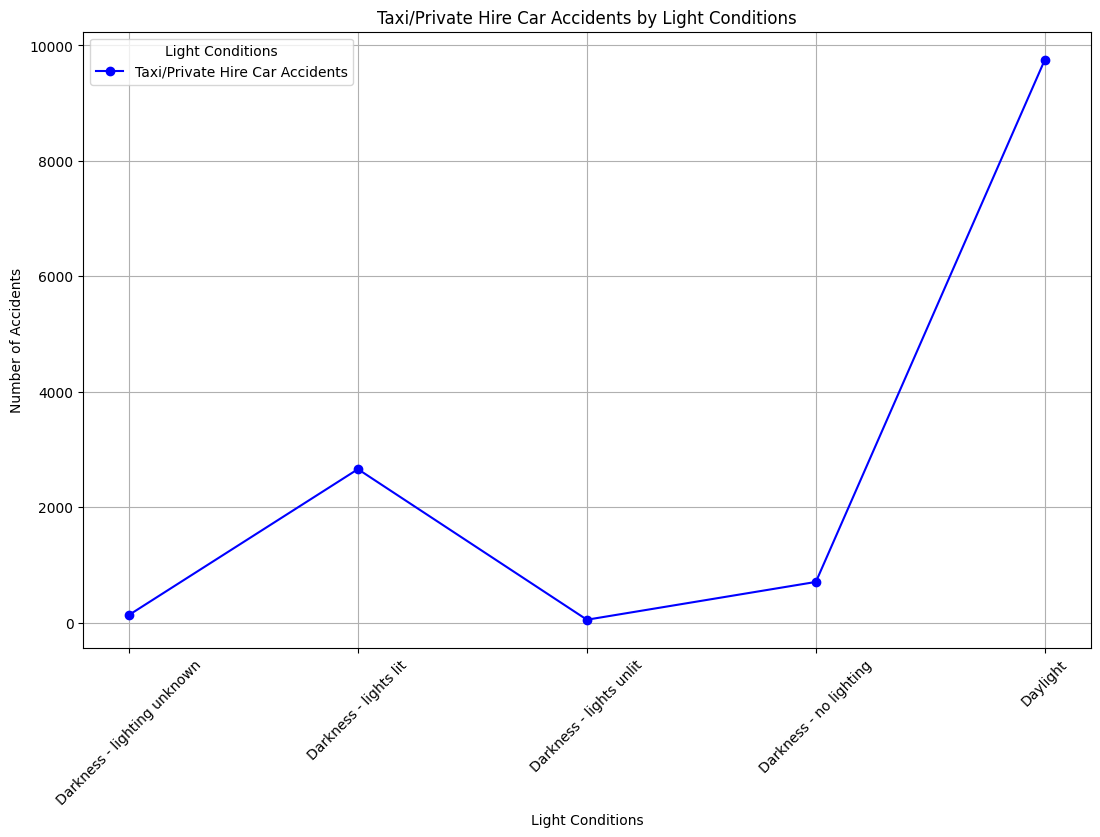

In [93]:
visual15 = accident[accident['Vehicle_Type'] == 'Taxi/Private hire car'].groupby('Light_Conditions').size()


plt.figure(figsize=(13, 8))
plt.plot(visual15.index, visual15.values, label="Taxi/Private Hire Car Accidents", marker='o', color='blue')


plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.title('Taxi/Private Hire Car Accidents by Light Conditions')
plt.xticks(rotation=45)  
plt.legend(title="Light Conditions")
plt.grid(True)

plt.show()


<h1> Insight 16 </h1>

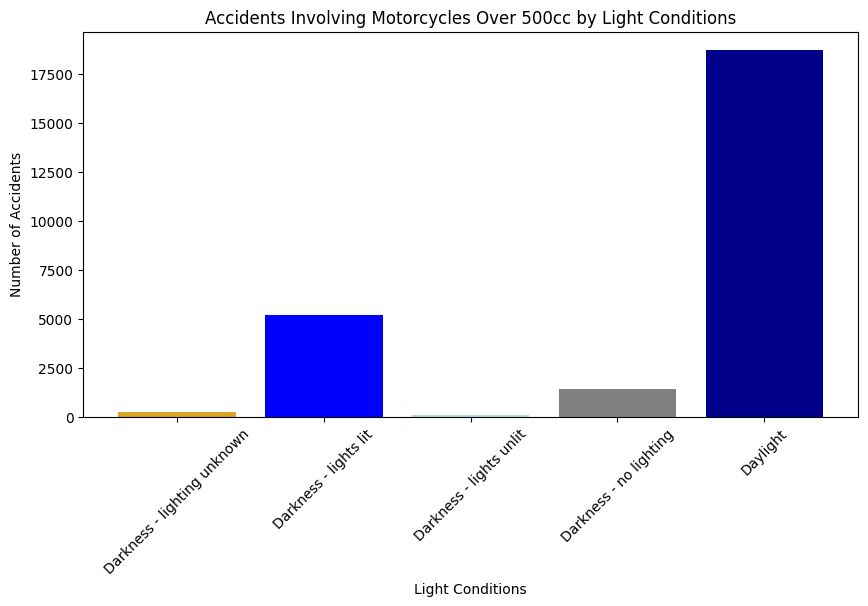

In [94]:
import matplotlib.pyplot as plt

visual16 = accident[accident['Vehicle_Type'] == 'Motorcycle over 500cc'].groupby('Light_Conditions').size()

plt.figure(figsize=(10, 5))
plt.bar(visual16.index, visual16.values, color=['goldenrod', 'blue', 'lightblue', 'gray', 'darkblue'])

plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accidents Involving Motorcycles Over 500cc by Light Conditions')
plt.xticks(rotation=45)  

plt.show()


<h1> Insight 17 </h1>

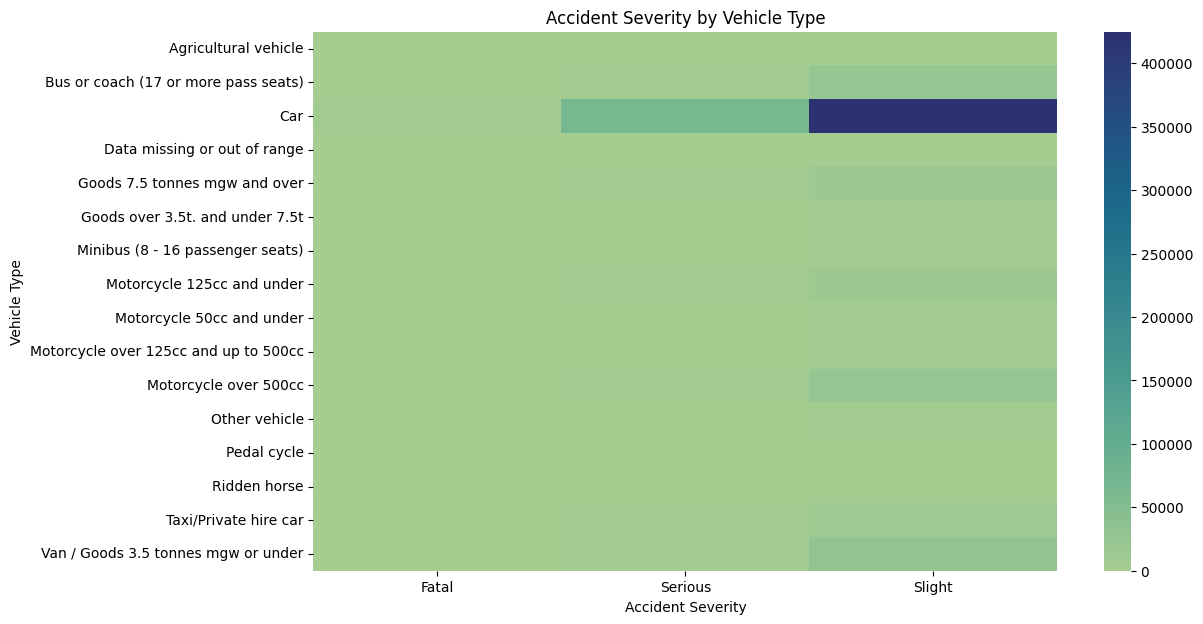

In [95]:
visual17 = accident.groupby(['Vehicle_Type', 'Accident_Severity']).size().unstack()

plt.figure(figsize=(12, 7))
sns.heatmap(visual17, cmap="crest")

plt.xlabel('Accident Severity')
plt.ylabel('Vehicle Type')
plt.title('Accident Severity by Vehicle Type')

plt.show()


<h1> Insight 18 </h1>

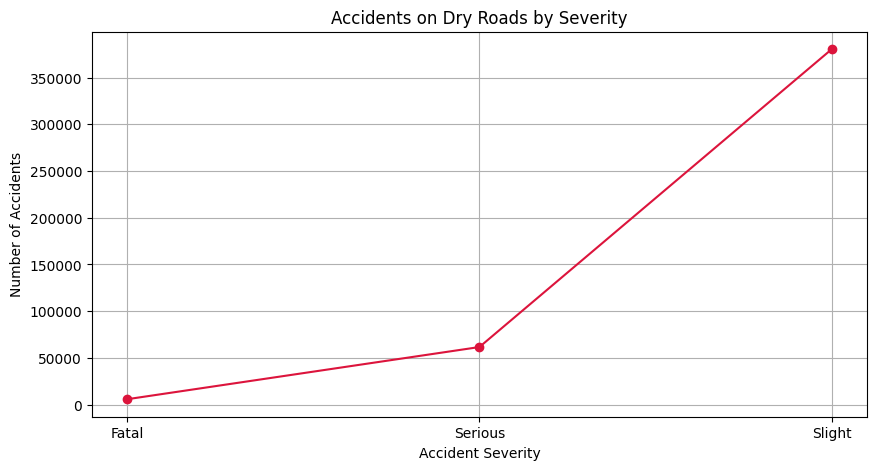

In [96]:
visual18 = accident[accident['Road_Surface_Conditions'] == 'Dry']

visual18_line = visual18.groupby('Accident_Severity').size()

plt.figure(figsize=(10, 5))
plt.plot(visual18_line.index, visual18_line.values, marker='o', linestyle='-', color='crimson')

plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.title('Accidents on Dry Roads by Severity')
plt.grid(True)

plt.show()


<h1> Insight 19  </h1>

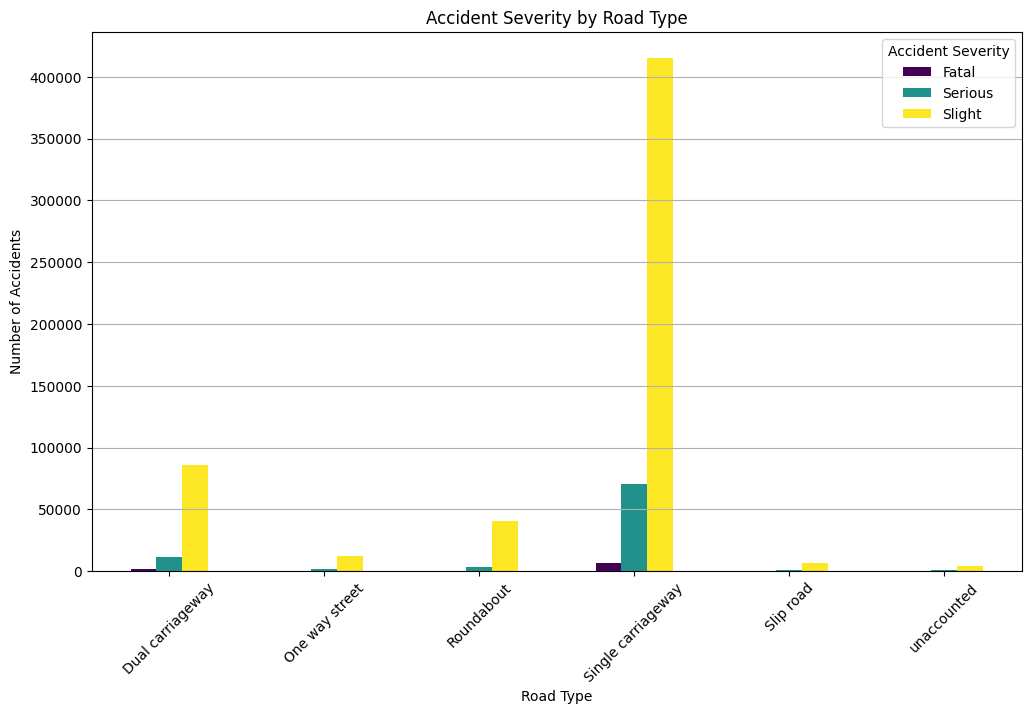

In [97]:
visual19 = accident.groupby('Road_Type')['Accident_Severity'].value_counts().unstack()

visual19.plot(kind='bar', figsize=(12, 7), colormap='viridis')

plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.title('Accident Severity by Road Type')
plt.xticks(rotation=45) 
plt.legend(title="Accident Severity")
plt.grid(axis='y')

plt.show()


<h1> Insight 20  </h1>

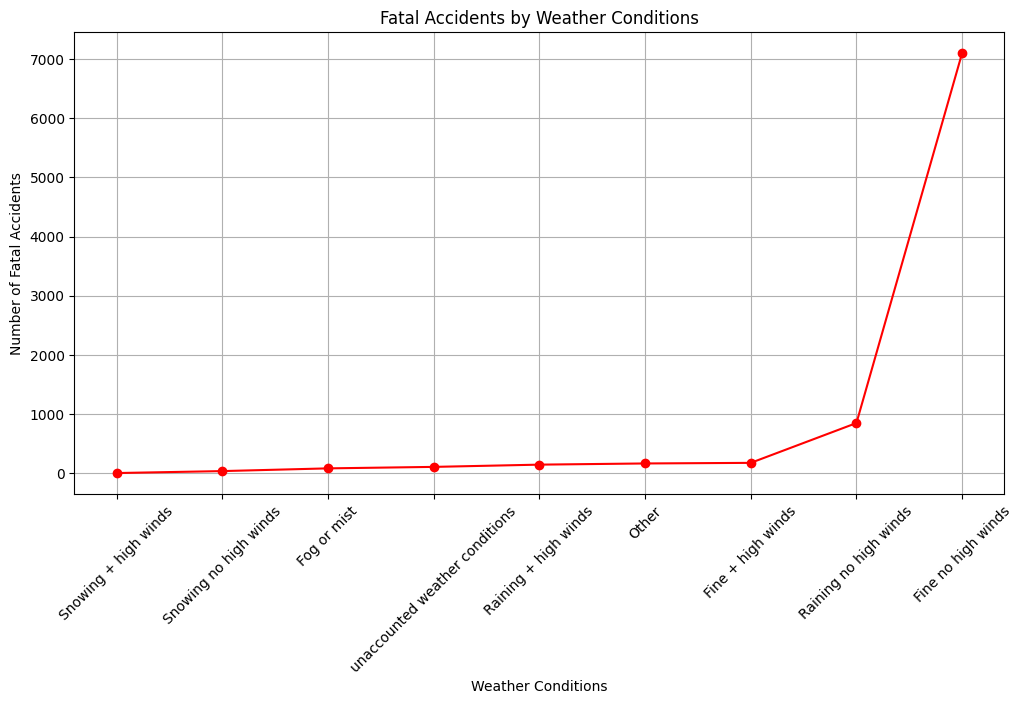

In [98]:
visual20 = accident[accident['Accident_Severity'] == 'Fatal'].groupby('Weather_Conditions').size().sort_values()

plt.figure(figsize=(12, 6))
plt.plot(visual20.index, visual20.values, marker='o', linestyle='-', color='red')

plt.xlabel('Weather Conditions')
plt.ylabel('Number of Fatal Accidents')
plt.title('Fatal Accidents by Weather Conditions')
plt.xticks(rotation=45) 
plt.grid(True)

plt.show()


<h1> Insight 21  </h1>

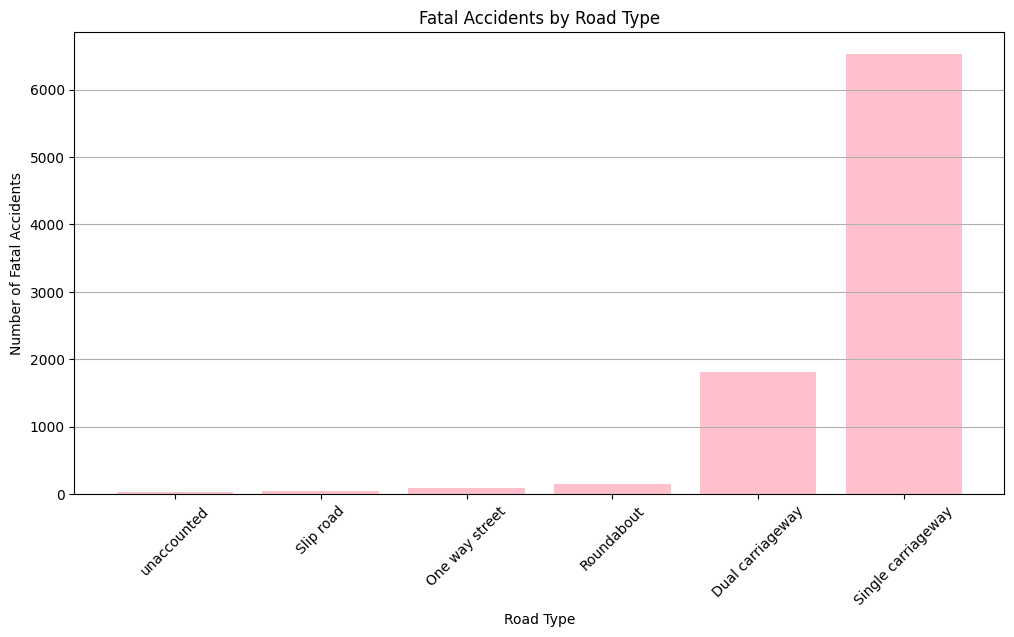

In [99]:
visual21 = accident[accident['Accident_Severity'] == 'Fatal'].groupby('Road_Type').size().sort_values()

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(visual21.index, visual21.values, color='pink')

# Adjust plot settings
plt.xlabel('Road Type')
plt.ylabel('Number of Fatal Accidents')
plt.title('Fatal Accidents by Road Type')
plt.xticks(rotation=45) 
plt.grid(axis='y',)

plt.show()
